In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

data = np.random.randn(1000)

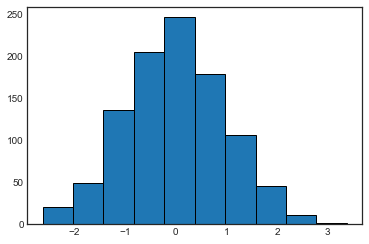

In [2]:
plt.hist(data, edgecolor='black');

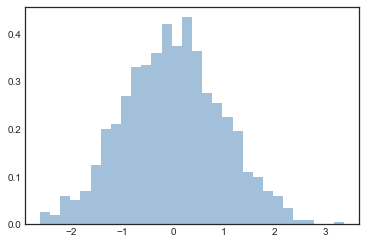

In [3]:
plt.hist(data, bins=30, alpha=0.5, density=True, histtype='stepfilled', color='steelblue', edgecolor='none');

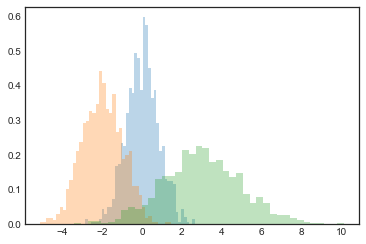

In [4]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs);

In [5]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 70 341 425 152  12]


In [6]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

In [17]:
pd.DataFrame({'x': x, 'y': y})

,x,y
0,0.199263,0.517450
1,-0.189711,-1.155102
2,0.515893,1.007992
3,0.759764,1.849083
4,0.507996,0.208399
...,...,...
9995,-0.697255,-0.434639
9996,-0.590023,-0.777065
9997,1.014067,2.760549
9998,0.902240,-0.257659


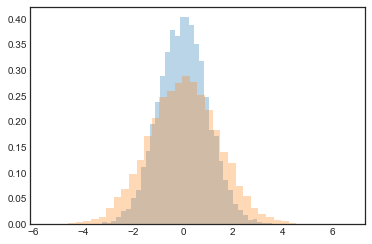

In [35]:
kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)
plt.hist(x, **kwargs)
plt.hist(y, **kwargs);

## `plt.hist2d`: Two-dimensional histogram

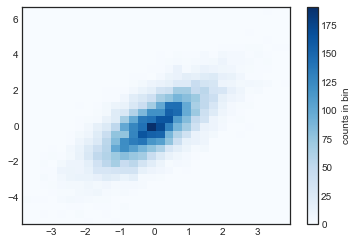

In [25]:
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [38]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

## `plt.hexbin`: Hexagomal binnings

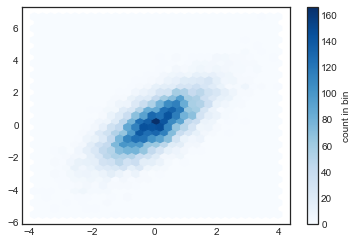

In [41]:
# 헥사곤으로 출력
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin')

## Kernel density estimation (KDE)

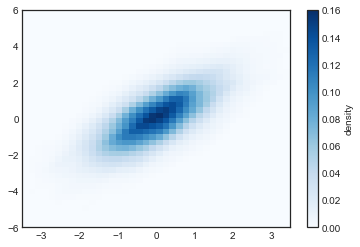

In [52]:
from scipy.stats import gaussian_kde

# fit an array of size [Ndim, Nsamples]
data = np.vstack([x, y])    # (2, 10000)
kde = gaussian_kde(data)

# evaluate on a regular grid
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

# Plot the result as an image
plt.imshow(Z.reshape(Xgrid.shape), origin='lower', aspect='auto', extent=[-3.5, 3.5, -6, 6], cmap='Blues')
cb = plt.colorbar()
cb.set_label('density')